## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge (mouse_metadata, study_results, on="Mouse ID", how = "left")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
merge_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_duplicates = merge_df.duplicated(subset=["Mouse ID"])
mouse_duplicates


0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merge_df.drop_duplicates(["Mouse ID", "Timepoint"])
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_data_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regim


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_regimen_mean = clean_data_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_regimen_mean

# drug_regimen_mean = drug_regimen_grouped.mean()["Tumor Volume (mm3)"]
# drug_regimen_mean


# drug_regimen_median = drug_regimen_grouped.median()["Tumor Volume (mm3)"]
# drug_regimen_median


# drug_regimen_variance = drug_regimen_grouped["Tumor Volume (mm3)"].var()


# drug_regimen_stdev = drug_regimen_grouped["Tumor Volume (mm3)"].std()


# drug_regimen_sem = drug_regimen_grouped["Tumor Volume (mm3)"].sem()



Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.368318
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Assemble the resulting series into a single summary dataframe.

summary_statistics = pd.DataFrame({"Mean": drug_regimen_mean, "Median": drug_regimen_median, "Variance": drug_regimen_variance, "Standard Deviation": drug_regimen_stdev, "SEM": drug_regimen_sem})

summary_statistics

NameError: name 'drug_regimen_median' is not defined

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line
aggregate_data = clean_data_df.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"})
                                                                                         
aggregate_data 

## Bar and Pie Charts

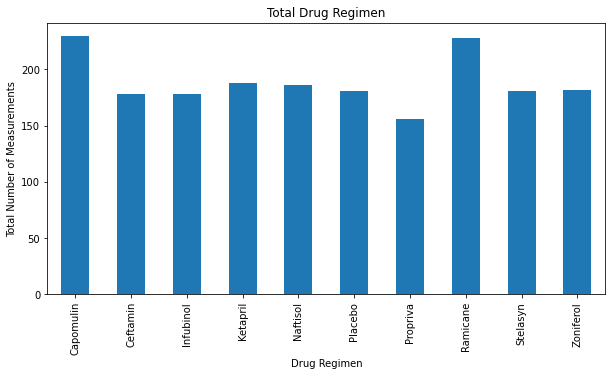

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

regimen_count = clean_data_df.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]
regimen_count

regimen_count.plot(kind = "bar", figsize = (10,5))
plt.title("Total Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")

plt.show()

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = clean_data_df.groupby("Sex")
groupby_gender

groupby_gender_count = pd.DataFrame(groupby_gender["Sex"].count())

groupby_gender_count.head()

groupby_gender_count.plot(kind="pie", y="sex", \ title = "Male vs Female Distribution", startangle=140,\ autopct = "%1.1f%%", shadow=True, fontsize = 16, colors = ["pink", "lightblue"], legend=false)

plt.axis("equal")
plt.show()


# colors = ["pink", "blue"]

# plot = groupby_gender.plot.pie(y="Sex", figsize=(5,5), colors = colors, startangle = 180, autopct = "%1.1f%%")

# plt.title("Male vs Female Distribution")




SyntaxError: unexpected character after line continuation character (<ipython-input-34-a748e71d5b6d>, line 9)

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]

gender_counts = 

colors = ["pink", "blue"]

plt.pie(gender_counts, labels=gender, colors=colors, auotpct="%1.1f%%", startangle=140)
plt.title("Male vs Female Distribution")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimen_treatments = clean_data_df.groupby(["Drug Regimen", "Mouse ID"])
regimen_treatments.head()


four_treatments = regimen_treatments.loc(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
four_treatments.head()


# Start by getting the last (greatest) timepoint for each mouse

four_treatments_timepoint = regimen_treatments.loc(["Timepoint"], ascending = True)
four_treatments_timepoint.head()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

TypeError: 'DataFrameGroupBy' object is not callable

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
for drug in 
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_vol = clean_data_df.loc[clean_data_df["Drug Regimen" == "Capomulin"]]
tumor_vol_time = tumor_vol[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

line_plot = tumor_vol_time.rest_index()



In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
campomulin_scatter = clean_data_df.groupby[clean_data_df["Drug Regimen"]]

campomulin_scatter.head()
# campomulin_scatter_plot = plt.scatter("average_tumor_volume", "Mouse Weight") 

# plt.title("Average Tumor Volume vs Mouse Weight for Campomulin")
# plt.xlable("Mouse Weight")
# plt.ylable("Average Tumor Volume")

TypeError: 'method' object is not subscriptable

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
#linear regression

correlation = st.pearsonr(average_tumor_volume, mouse_weight)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor)
regress_line = slope * weight + intercept 



# for mouse weight and average tumor volume for the Capomulin regimen
